In [24]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

In [25]:
path = untar_data(URLs.MNIST_SAMPLE)

In [26]:
??untar_data

Signature:
untar_data(
    url: 'str',
    archive: 'Path' = None,
    data: 'Path' = None,
    c_key: 'str' = 'data',
    force_download: 'bool' = False,
    base: 'str' = '~/.fastai',
) -> 'Path'
Source:   
def untar_data(
    url:str, # File to download
    archive:Path=None, # Optional override for `Config`'s `archive` key
    data:Path=None, # Optional override for `Config`'s `data` key
    c_key:str='data', # Key in `Config` where to extract file
    force_download:bool=False, # Setting to `True` will overwrite any existing copy of data
    base:str='~/.fastai' # Directory containing config file and base of relative paths
) -> Path: # Path to extracted file(s)
    "Download `url` using `FastDownload.get`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base=base)
    return d.get(url, force=force_download, extract_key=c_key)
File:      c:\users\setupgame\appdata\local\programs\python\python311\lib\site-packages\fastai\data\external.py
Type:     

In [27]:
path.ls()

(#3) [Path('C:/Users/SetupGame/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/valid')]

In [28]:
(path / 'train').ls()

(#2) [Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/7')]

In [56]:
threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()
threes

(#6131) [Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/SetupGame/.fastai/data/mnist_sample/train/3/10091.png')...]

In [79]:
img3_path = threes[1]
img7_path = sevens[1]
im3 = Image.open(img3_path)
im7 = Image.open(img7_path)


In [58]:
array(im3)[4:10, 4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [59]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [60]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [61]:
im7_t = tensor(im7)
dm = pd.DataFrame(im7_t)
dm.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,1,13,7,0,0,0,0,0,0,2,93,244,207,8,0,0,0
7,0,0,0,0,0,0,0,0,0,0,15,157,254,197,0,0,0,0,0,18,131,254,254,248,11,0,0,0
8,0,0,0,0,0,0,0,0,0,9,220,254,254,230,104,0,0,0,65,216,254,254,254,218,8,0,0,0
9,0,0,0,0,0,0,0,0,0,169,254,254,231,126,40,11,70,180,254,254,254,254,254,90,0,0,0,0


In [62]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors) , len(seven_tensors)

(6131, 6265)

<Axes: >

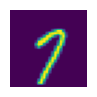

In [66]:
show_image(seven_tensors[15])

In [68]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.size()

torch.Size([6131, 28, 28])

In [71]:
len(stacked_threes.shape)

3

In [72]:
stacked_threes.ndim

3

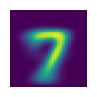

In [75]:
mean7 =stacked_sevens.mean(0)
show_image(mean7);

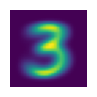

In [77]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

In [78]:
mean3

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

'My try'

In [105]:
err1 = 0 
for i in range(0,28) :
    for j in range(0,28):
     err1 += (a_3[i,j] - mean7[i,j])**2

err2 = 0 
for i in range(0,28) :
    for j in range(0,28):
     err2 += (a_3[i,j] - mean3[i,j])**2

err1 , err2 

(tensor(71.5555), tensor(32.0167))

In [80]:
im7.shape

(28, 28)

In [84]:
im7

In [93]:
im3

In [98]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]

In [109]:
dist3_abs = (a_3 - mean3).abs().mean()
dist_7_sqr = ((a_3.float() - mean3)**2).mean().sqrt()

dist3_abs , dist3_sqr


(tensor(0.1114), tensor(0.2021))

In [106]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [110]:
F.l1_loss(a_3.float(), mean3) , F.mse_loss(a_3.float(), mean3).sqrt()

(tensor(0.1114), tensor(0.2021))

In [111]:
F.l1_loss(a_3.float(), mean7) , F.mse_loss(a_3.float(), mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [115]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [116]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [118]:
tns[1]

tensor([4, 5, 6])

In [119]:
arr[1]

array([4, 5, 6])

In [120]:
tns[:,1]

tensor([2, 5])

In [121]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [122]:
tns.type()

'torch.LongTensor'

In [125]:
(tns * 1.5).type()

'torch.FloatTensor'

In [124]:
tns.type()

'torch.LongTensor'

In [171]:
valid_3_tens  = torch.stack([tensor(Image.open(o))for o in (path/'valid'/'3').ls()])

In [135]:
valid_3_tens = valid_3_tens.float() / 255

In [137]:
valid_7_tens  = torch.stack([tensor(Image.open(o))for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens / 255

In [138]:
valid_3_tens.shape ,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [156]:
def mnist_distance(a,b): return (a-b).abs().mean((-1 , -2))

mnist_distance(a_3, mean3)


tensor(0.1114)

In [157]:
valid_3_dist = mnist_distance(valid_3_tens , mean3)
valid_3_dist , valid_3_dist.shape

(tensor([0.1411, 0.1408, 0.1409,  ..., 0.1411, 0.1409, 0.1409]),
 torch.Size([1010]))

In [168]:
def is_3(x ): return mnist_distance(x , mean3) < mnist_distance(x , mean7)

In [176]:
def is_7(x ): return mnist_distance(x , mean3) > mnist_distance(x , mean7)

In [169]:
is_3(a_3)  , is_3(a_3).float()

(tensor(True), tensor(1.))

In [172]:
print(is_3(valid_3_tens))

tensor([ True,  True,  True,  ..., False,  True,  True])


In [174]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_3s

tensor(0.9436)

In [178]:
accuracy_7s = is_7(valid_7_tens).float().mean()
accuracy_7s

tensor(0.9815)

In [179]:
accuracy_3s , accuracy_7s , (accuracy_3s + accuracy_7s) /2 

(tensor(0.9436), tensor(0.9815), tensor(0.9625))

In [192]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [193]:
def f(x): return (x**2).sum()

f(xt).backward()
xt.grad

tensor([ 6.,  8., 20.])

In [196]:
time = torch.arange(0,20).float() 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

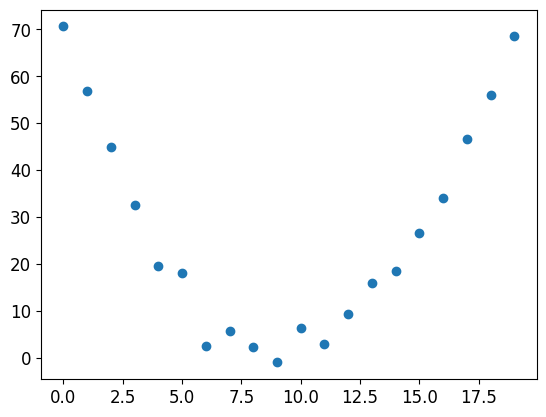

In [206]:

speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);